In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

In [2]:
org = xr.open_dataset('/results/forcing/atmospheric/GEM2.5/gemlam/gemlam_y2007m11d05.nc')

Now going for 4th try

In [8]:
avg3 = xr.open_dataset('ncfiles/reconCW_y2007m11d05.nc')

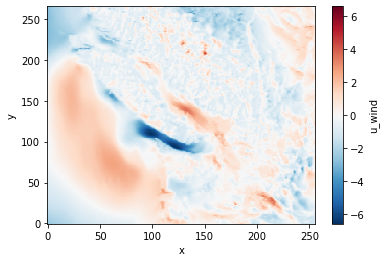

In [5]:
org.u_wind[0:3].mean(axis=0).plot();

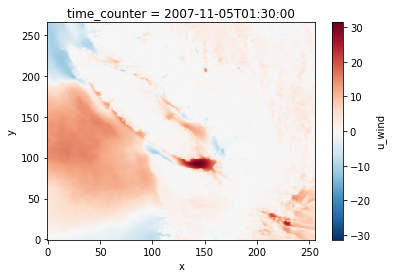

In [6]:
avg3.u_wind[0].plot();

A factor of 5 high and sign is wrong.

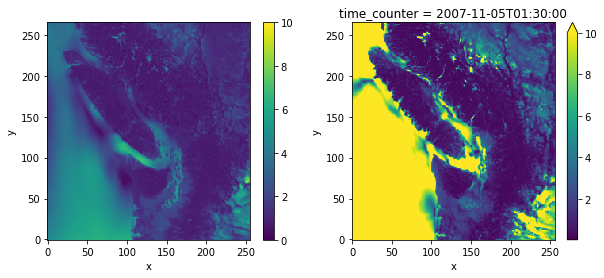

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
np.sqrt(org.u_wind[1:4]**2 + org.v_wind[1:4]**2).mean(axis=0).plot(ax=axs[0], vmax=10, vmin=0)
np.sqrt(avg3.u_wind[0]**2 + avg3.v_wind[0]**2).plot(ax=axs[1], vmax=10);

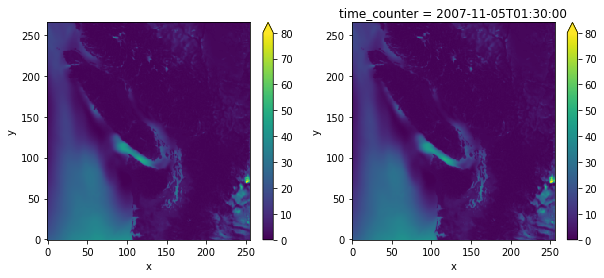

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
(org.u_wind[1:4]**2 + org.v_wind[1:4]**2).mean(axis=0).plot(ax=axs[0], vmax=80, vmin=0)
(coravg3.u_wind[0]**2 + coravg3.v_wind[0]**2).plot(ax=axs[1], vmax=80, vmin=0);

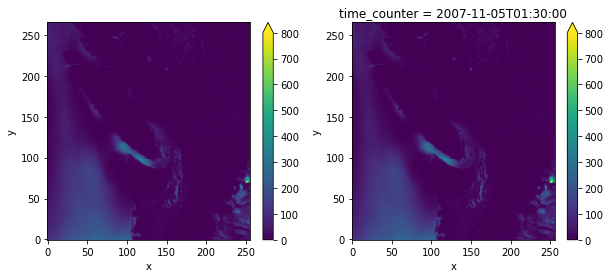

In [190]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
((org.u_wind[1:4]**2 + org.v_wind[1:4]**2)**1.5).mean(axis=0).plot(ax=axs[0], vmax=800, vmin=0)
((coravg3.u_wind[0]**2 + coravg3.v_wind[0]**2)**1.5).plot(ax=axs[1], vmax=800, vmin=0);

In [191]:
us = org.u_wind[1:4, 50, 50].values
vs = org.v_wind[1:4, 50, 50].values
us, vs

(array([1.4158316, 1.0692837, 1.0650749], dtype=float32),
 array([-5.34129  , -5.1282625, -5.0840106], dtype=float32))

In [192]:
ta = (np.sqrt(us**2 + vs**2)**3).mean()
ta

150.87805

In [193]:
((us**2 + vs**2)**1.5).mean()

150.87807

In [194]:
avg_th = np.arctan2((vs).mean(), (us).mean())
avg_th

-1.3463852

In [195]:
tu, tv = ta*np.cos(avg_th), ta*np.sin(avg_th)
tu, tv

(33.575233, -147.09483)

In [196]:
tts = np.sqrt(tu**2 + tv**2)**(1/3)
tta = np.arctan2(tv, tu)
ttu = tts*np.cos(tta)
ttv = tts*np.sin(tta)
ttu, ttv

(1.18468165156637, -5.190151640584888)

In [197]:
coravg3.u_wind[0, 50, 50].values, coravg3.v_wind[0, 50, 50].values

(array(1.18468195), array(-5.19015162))

In [182]:
coravg3.close()